# Esport - Prediction using a neural network

This jupyter notebook can be found here https://drive.google.com/file/d/1pSjUtsf3tacWbv0bdXDcfGVdhrHg4pJx/view?usp=sharing

- Demo file: https://drive.google.com/file/d/1AVZ3IdrN-TCkclVUcSEyjwrYMH58aqWe/view?usp=sharing

Project requirements:
<br>numpy
<br>pandas
<br>scikit-learn
<br>keras
<br>matplotlib
<br>seaborn
<br>demoparser2
<br>jupyterlab
<br>tensorflow

Useful links:
- HLTV results - https://www.hltv.org/results
- CS2 events - https://cs2.poggu.me/dumped-data/game-events/
- CS2 map sizes - https://github.com/pnxenopoulos/awpy/blob/main/awpy/data/map_data.py

CS2 Parser:
- Parser - https://github.com/LaihoE/demoparser
- Documentation - https://github.com/LaihoE/demoparser/tree/main/documentation/python
- Example - https://github.com/LaihoE/demoparser/blob/main/examples/1vX/main.py
- Examples - https://github.com/LaihoE/demoparser/tree/main/examples

## Imports

In [6]:
from demoparser2 import DemoParser # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.image as mpimg # type: ignore
from matplotlib.collections import LineCollection # type: ignore
import numpy as np # type: ignore
import pandas as pd # type: ignore
from matplotlib import cm # type: ignore
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Input # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

## Functions

# Data overview

In [7]:
parser = DemoParser("demos\eternal-fire-vs-natus-vincere-m2-mirage(1).dem")

## Events

In [8]:
df_deaths = parser.parse_event("player_death", player=["X", "Y"], other=["total_rounds_played"])
df_weapon_fires = parser.parse_event("weapon_fire", player=["X", "Y"], other=["total_rounds_played"])
df_player_spawns = parser.parse_event("player_spawn", other=["total_rounds_played"])
df_player_teams = parser.parse_event("player_team", other=["total_rounds_played"])
df_player_hurts = parser.parse_event("player_hurt", other=["total_rounds_played"])
df_round_starts = parser.parse_event("round_start")
df_round_ends = parser.parse_event("round_end")
df_last_round_half = parser.parse_event("round_announce_last_round_half")
df_item_purchases = parser.parse_event("item_purchase", other=["total_rounds_played"])
df_item_pickups = parser.parse_event("item_pickup", other=["total_rounds_played"])
df_bomb_plants = parser.parse_event("bomb_planted", other=["total_rounds_played"])
df_bomb_defuses = parser.parse_event("bomb_defused", other=["total_rounds_played"])
df_bomb_explosions = parser.parse_event("bomb_exploded", other=["total_rounds_played"])
df_bomb_drops = parser.parse_event("bomb_dropped", other=["total_rounds_played"])
df_bomb_pickups = parser.parse_event("bomb_pickup", other=["total_rounds_played"])
df_hegrenade_detonations = parser.parse_event("hegrenade_detonate", other=["total_rounds_played"])
df_flashbang_detonations = parser.parse_event("flashbang_detonate", other=["total_rounds_played"])
df_smokegrenade_detonations = parser.parse_event("smokegrenade_detonate", other=["total_rounds_played"])
df_smokegrenade_expirations = parser.parse_event("smokegrenade_expired", other=["total_rounds_played"])
df_inferno_startburns = parser.parse_event("inferno_startburn", other=["total_rounds_played"])
df_inferno_expirations = parser.parse_event("inferno_expire", other=["total_rounds_played"])
df_player_pings = parser.parse_event("player_ping", other=["total_rounds_played"])
df_player_sounds = parser.parse_event("player_sound", other=["total_rounds_played"])
df_ticks = parser.parse_ticks(["X", "Y"])

In [9]:
max_round = df_player_spawns["total_rounds_played"].max() + 1
max_round

18

Team interpretation in numbers:
- 3 = CT
- 2 = T

In [10]:
df_player_teams

disconnect  isbot  oldteam  silent  team   tick  total_rounds_played  \
0       False  False        2    True     3  87273                   12   
1       False  False        3    True     2  87273                   12   
2       False  False        2    True     3  87273                   12   
3       False  False        3    True     2  87273                   12   
4       False  False        3    True     2  87273                   12   
5       False  False        2    True     3  87273                   12   
6       False  False        3    True     2  87273                   12   
7       False  False        2    True     3  87273                   12   
8       False  False        2    True     3  87273                   12   
9       False  False        3    True     2  87273                   12   

   user_name       user_steamid  
0         jL  76561198176878303  
1      Calyx  76561198052546265  
2  w0nderful  76561199063068840  
3    Wicadia  76561198812513923  
4      MAJ3R  76561197967432889  
5    Aleksib  76561198013243326  
6   XANTARES  76561198044118796  
7        b1t  76561198246607476  
8         iM  76561198050250233  
9      woxic  76561198083485506

Another approach

In [11]:
df_team_info2 = parser.parse_player_info();
df_team_info2

steamid       name  team_number
0  76561198176878303         jL            3
1  76561198052546265      Calyx            2
2  76561199063068840  w0nderful            3
3  76561198812513923    Wicadia            2
4  76561197967432889      MAJ3R            2
5  76561198013243326    Aleksib            3
6  76561198044118796   XANTARES            2
7  76561198246607476        b1t            3
8  76561198050250233         iM            3
9  76561198083485506      woxic            2

## Predicting of player deaths in a game round

In [12]:
df_weapon_fires

silenced    tick  total_rounds_played       user_X      user_Y  \
0        False    1258                    0  1296.000000   32.000000   
1        False    1514                    0 -1372.368164 -977.939453   
2        False    1661                    0 -1921.021362 -325.519287   
3        False    1723                    0   386.088837   51.468979   
4         True    1766                    0 -1174.323120 -727.842529   
...        ...     ...                  ...          ...         ...   
3066     False  137623                   17 -2260.312012  628.897278   
3067     False  137650                   17 -2255.038330  627.889587   
3068      True  137667                   17 -1801.680664  -54.884399   
3069      True  137674                   17 -1800.396851  -55.175659   
3070     False  137684                   17 -1847.084473  -98.833923   

      user_name       user_steamid                 weapon  
0       Aleksib  76561198013243326    weapon_smokegrenade  
1      XANTARES  76561198044118796  weapon_knife_karambit  
2         Calyx  76561198052546265  weapon_knife_karambit  
3           b1t  76561198246607476       weapon_flashbang  
4      XANTARES  76561198044118796    weapon_usp_silencer  
...         ...                ...                    ...  
3066    Aleksib  76561198013243326          weapon_deagle  
3067    Aleksib  76561198013243326          weapon_deagle  
3068         iM  76561198050250233   weapon_m4a1_silencer  
3069         iM  76561198050250233   weapon_m4a1_silencer  
3070  w0nderful  76561199063068840             weapon_awp  

[3071 rows x 8 columns]

### Aggregating Data - Simplified example

Overview of weapon fires dataframe.

In [13]:
df_weapon_fires

silenced    tick  total_rounds_played       user_X      user_Y  \
0        False    1258                    0  1296.000000   32.000000   
1        False    1514                    0 -1372.368164 -977.939453   
2        False    1661                    0 -1921.021362 -325.519287   
3        False    1723                    0   386.088837   51.468979   
4         True    1766                    0 -1174.323120 -727.842529   
...        ...     ...                  ...          ...         ...   
3066     False  137623                   17 -2260.312012  628.897278   
3067     False  137650                   17 -2255.038330  627.889587   
3068      True  137667                   17 -1801.680664  -54.884399   
3069      True  137674                   17 -1800.396851  -55.175659   
3070     False  137684                   17 -1847.084473  -98.833923   

      user_name       user_steamid                 weapon  
0       Aleksib  76561198013243326    weapon_smokegrenade  
1      XANTARES  76561198044118796  weapon_knife_karambit  
2         Calyx  76561198052546265  weapon_knife_karambit  
3           b1t  76561198246607476       weapon_flashbang  
4      XANTARES  76561198044118796    weapon_usp_silencer  
...         ...                ...                    ...  
3066    Aleksib  76561198013243326          weapon_deagle  
3067    Aleksib  76561198013243326          weapon_deagle  
3068         iM  76561198050250233   weapon_m4a1_silencer  
3069         iM  76561198050250233   weapon_m4a1_silencer  
3070  w0nderful  76561199063068840             weapon_awp  

[3071 rows x 8 columns]

Overview of deaths dataframe.

In [14]:
df_deaths

assistedflash   assister_X   assister_Y assister_name   assister_steamid  \
0            False          NaN          NaN          None               None   
1            False          NaN          NaN          None               None   
2            False  -531.607178 -2378.742432      XANTARES  76561198044118796   
3            False          NaN          NaN          None               None   
4            False          NaN          NaN          None               None   
..             ...          ...          ...           ...                ...   
120          False          NaN          NaN          None               None   
121          False -2065.616211  -559.346924            iM  76561198050250233   
122          False -1064.924072   151.871338      XANTARES  76561198044118796   
123          False -1699.792603   683.121765            jL  76561198176878303   
124          False          NaN          NaN          None               None   

      attacker_X   attacker_Y attacker_name   attacker_steamid  attackerblind  \
0     296.651398 -1586.485962       Aleksib  76561198013243326          False   
1    -452.761658 -1758.071045       Aleksib  76561198013243326          False   
2   -1570.978027  -760.632751         MAJ3R  76561197967432889          False   
3    -812.001831 -2082.587646     w0nderful  76561199063068840          False   
4            NaN          NaN          None               None          False   
..           ...          ...           ...                ...            ...   
120 -1698.991211   682.782166            jL  76561198176878303          False   
121 -1699.885620   681.705627            jL  76561198176878303          False   
122 -1022.358459   120.646042         woxic  76561198083485506          False   
123 -2495.580322   328.931458       Aleksib  76561198013243326          False   
124 -1847.084473   -98.833923     w0nderful  76561199063068840          False   

     ...  total_rounds_played       user_X       user_Y  user_name  \
0    ...                    0   150.391434 -1526.738159    Wicadia   
1    ...                    0  -531.607178 -2378.742432   XANTARES   
2    ...                    0 -1272.865112 -1050.418091         iM   
3    ...                    0  -465.970337 -2350.779785      Calyx   
4    ...                    0 -1693.296631 -1375.607422    Aleksib   
..   ...                  ...          ...          ...        ...   
120  ...                   17 -1064.924072   151.871338   XANTARES   
121  ...                   17 -1210.908081   285.837585      MAJ3R   
122  ...                   17 -1699.831299   683.073303         jL   
123  ...                   17 -1021.273499   123.897125      woxic   
124  ...                   17 -1736.028687   849.204041      Calyx   

          user_steamid         weapon     weapon_fauxitemid  weapon_itemid  \
0    76561198812513923          glock  17293822569165815812    20660576547   
1    76561198044118796          glock  17293822569165815812    20660576547   
2    76561198050250233   usp_silencer  17293822569145761853    13626608964   
3    76561198052546265          glock  17293822569105195012    34398553971   
4    76561198013243326     planted_c4                                        
..                 ...            ...                   ...            ...   
120  76561198044118796  m4a1_silencer  17293822569131868220    34241486015   
121  76561197967432889  m4a1_silencer  17293822569131868220    34241486015   
122  76561198176878303           ak47  17293822569170534407    25065970543   
123  76561198083485506         deagle  17293822569105129473    29398974889   
124  76561198052546265            awp  17293822569146089481    36570875316   

     weapon_originalowner_xuid  wipe  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  
..                         ...   ...  
120     

Merge dataframes for a round-level analysis.

In [15]:
df = pd.merge(df_weapon_fires, df_deaths, on=["total_rounds_played", "user_steamid"], how="left")
df["player_died"] = np.where(df["attacker_name"].notnull(), 1, 0)
df

silenced  tick_x  total_rounds_played     user_X_x    user_Y_x  \
0        False    1258                    0  1296.000000   32.000000   
1        False    1514                    0 -1372.368164 -977.939453   
2        False    1661                    0 -1921.021362 -325.519287   
3        False    1723                    0   386.088837   51.468979   
4         True    1766                    0 -1174.323120 -727.842529   
...        ...     ...                  ...          ...         ...   
3127     False  137623                   17 -2260.312012  628.897278   
3128     False  137650                   17 -2255.038330  627.889587   
3129      True  137667                   17 -1801.680664  -54.884399   
3130      True  137674                   17 -1800.396851  -55.175659   
3131     False  137684                   17 -1847.084473  -98.833923   

     user_name_x       user_steamid               weapon_x assistedflash  \
0        Aleksib  76561198013243326    weapon_smokegrenade         False   
1       XANTARES  76561198044118796  weapon_knife_karambit         False   
2          Calyx  76561198052546265  weapon_knife_karambit         False   
3            b1t  76561198246607476       weapon_flashbang           NaN   
4       XANTARES  76561198044118796    weapon_usp_silencer         False   
...          ...                ...                    ...           ...   
3127     Aleksib  76561198013243326          weapon_deagle           NaN   
3128     Aleksib  76561198013243326          weapon_deagle           NaN   
3129          iM  76561198050250233   weapon_m4a1_silencer           NaN   
3130          iM  76561198050250233   weapon_m4a1_silencer           NaN   
3131   w0nderful  76561199063068840             weapon_awp           NaN   

      assister_X  ...  tick_y     user_X_y     user_Y_y  user_name_y  \
0            NaN  ...  5866.0 -1693.296631 -1375.607422      Aleksib   
1            NaN  ...  4059.0  -531.607178 -2378.742432     XANTARES   
2            NaN  ...  4449.0  -465.970337 -2350.779785        Calyx   
3            NaN  ...     NaN          NaN          NaN          NaN   
4            NaN  ...  4059.0  -531.607178 -2378.742432     XANTARES   
...          ...  ...     ...          ...          ...          ...   
3127         NaN  ...     NaN          NaN          NaN          NaN   
3128         NaN  ...     NaN          NaN          NaN          NaN   
3129         NaN  ...     NaN          NaN          NaN          NaN   
3130         NaN  ...     NaN          NaN          NaN          NaN   
3131         NaN  ...     NaN          NaN          NaN          NaN   

        weapon_y     weapon_fauxitemid weapon_itemid  \
0     planted_c4                                       
1          glock  17293822569165815812   20660576547   
2          glock  17293822569105195012   34398553971   
3            NaN                   NaN           NaN   
4          glock  17293822569165815812   20660576547   
...          ...                   ...           ...   
3127         NaN                   NaN           NaN   
3128         NaN                   NaN           NaN   
3129         NaN                   NaN           NaN   
3130         NaN                   NaN           NaN   
3131         NaN                   NaN           NaN   

     weapon_originalowner_xuid wipe  player_died  
0                               0.0            0  
1                               0.0            1  
2                               0.0            1  
3                          NaN  NaN            0  
4                               0.0            1  
...                        ...  ...          ...  
3127                       NaN  NaN            0  
3128                       NaN  NaN            0  
3129                       NaN  NaN            0  
3130                       NaN  NaN            0  
3131                       NaN  NaN            0  

[3132 rows x 40 columns]

### Neural network

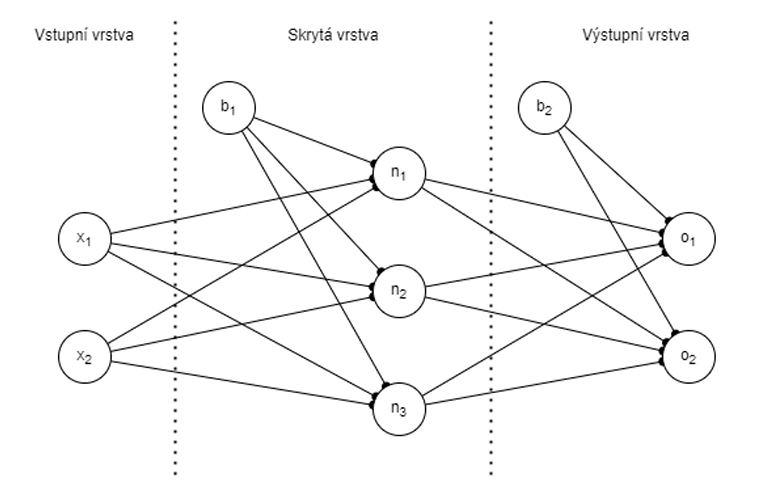

#### Data selection

- We use data with `_x` suffix, because we would like to use name of the attacker, victim and weapon from the `df_weapon_fires` dataframe.

In [16]:
X = df[["user_X_x", "user_Y_x", "weapon_x", "total_rounds_played"]]
y = df["player_died"]

In [17]:
X

user_X_x    user_Y_x               weapon_x  total_rounds_played
0     1296.000000   32.000000    weapon_smokegrenade                    0
1    -1372.368164 -977.939453  weapon_knife_karambit                    0
2    -1921.021362 -325.519287  weapon_knife_karambit                    0
3      386.088837   51.468979       weapon_flashbang                    0
4    -1174.323120 -727.842529    weapon_usp_silencer                    0
...           ...         ...                    ...                  ...
3127 -2260.312012  628.897278          weapon_deagle                   17
3128 -2255.038330  627.889587          weapon_deagle                   17
3129 -1801.680664  -54.884399   weapon_m4a1_silencer                   17
3130 -1800.396851  -55.175659   weapon_m4a1_silencer                   17
3131 -1847.084473  -98.833923             weapon_awp                   17

[3132 rows x 4 columns]

In [18]:
y

0       0
1       1
2       1
3       0
4       1
       ..
3127    0
3128    0
3129    0
3130    0
3131    0
Name: player_died, Length: 3132, dtype: int32

#### Data processing

One-hot encode the 'weapon_x' column (since it's categorical).

In [19]:
X = pd.get_dummies(X, columns=["weapon_x"])
X

user_X_x    user_Y_x  total_rounds_played  weapon_x_weapon_ak47  \
0     1296.000000   32.000000                    0                 False   
1    -1372.368164 -977.939453                    0                 False   
2    -1921.021362 -325.519287                    0                 False   
3      386.088837   51.468979                    0                 False   
4    -1174.323120 -727.842529                    0                 False   
...           ...         ...                  ...                   ...   
3127 -2260.312012  628.897278                   17                 False   
3128 -2255.038330  627.889587                   17                 False   
3129 -1801.680664  -54.884399                   17                 False   
3130 -1800.396851  -55.175659                   17                 False   
3131 -1847.084473  -98.833923                   17                 False   

      weapon_x_weapon_awp  weapon_x_weapon_deagle  weapon_x_weapon_elite  \
0                   False                   False                  False   
1                   False                   False                  False   
2                   False                   False                  False   
3                   False                   False                  False   
4                   False                   False                  False   
...                   ...                     ...                    ...   
3127                False                    True                  False   
3128                False                    True                  False   
3129                False                   False                  False   
3130                False                   False                  False   
3131                 True                   False                  False   

      weapon_x_weapon_flashbang  weapon_x_weapon_galilar  \
0                         False                    False   
1                         False                    False   
2                         False                    False   
3                          True                    False   
4                         False                    False   
...                         ...                      ...   
3127                      False                    False   
3128                      False                    False   
3129                      False                    False   
3130                      False                    False   
3131                      False                    False   

      weapon_x_weapon_glock  ...  weapon_x_weapon_knife_widowmaker  \
0                     False  ...                             False   
1                     False  ...                             False   
2                     False  ...                             False   
3                     False  ...                             False   
4                     False  ...                             False   
...                     ...  ...                               ...   
3127                  False  ...                             False   
3128                  False  ...                             False   
3129                  False  ...                             False   
3130                  False  ...                             False   
3131                  False  ...                             False   

      weapon_x_weapon_m4a1_silencer  weapon_x_weapon_mac10  \
0                             False                  False   
1                             False                  False   
2                             False                  False   
3                             False                  False   
4                             False                  False   
...                             ...                    ...   
3127                          False                  False   
3128                          False                  False   
3129                           True                  False   
3

Scale data to improve the performance and convergence.

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.58971678,  0.94432862, -1.73770765, ..., -0.03575993,
        -0.09834216, -0.27419013],
       [-0.83079472, -0.09453845, -1.73770765, ..., -0.03575993,
        -0.09834216, -0.27419013],
       [-1.53409894,  0.57656893, -1.73770765, ..., -0.03575993,
        -0.09834216, -0.27419013],
       ...,
       [-1.38111921,  0.85495559,  1.7833376 , ..., -0.03575993,
        -0.09834216, -0.27419013],
       [-1.37947353,  0.85465599,  1.7833376 , ..., -0.03575993,
        -0.09834216, -0.27419013],
       [-1.43932117,  0.80974723,  1.7833376 , ..., -0.03575993,
        -0.09834216, -0.27419013]])

Data split for training and testing phases with training size of 80 %.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(2505, 27)

Model with three dense layers and one input layer with size of `X_train`.

- Input layer is used to define the input shape.
- Last layer uses **sigmoid** activation because of binary classification.

In [23]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

Compile the model.

In [24]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

Model training phase.

In [25]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6849 - loss: 0.6055 - val_accuracy: 0.7530 - val_loss: 0.5304
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.7303 - loss: 0.5260 - val_accuracy: 0.7649 - val_loss: 0.5271
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.7809 - loss: 0.4807 - val_accuracy: 0.7570 - val_loss: 0.5226
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7820 - loss: 0.4769 - val_accuracy: 0.7649 - val_loss: 0.5032
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7764 - loss: 0.4595 - val_accuracy: 0.7729 - val_loss: 0.4925
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7867 - loss: 0.4582 - val_accuracy: 0.7610 - val_loss: 0.4863
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7809 - loss: 0.4593 - val_accuracy: 0.7729 - val_loss: 0.4817
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7801 - loss: 0.4462 - val_accuracy: 0.75

Testing phase by evaluating the model with testing data.

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.7817 - loss: 0.4514
Model Accuracy: 0.7623604536056519


# Task 2

Create **two** different neural networks to predict some interesting situations that may affect the game.

Use the previous example for implementation.

Here are some examples:
- Predicting bomb plant in a game round - Predict if a bomb will be planted in a given round based on weapon fires, player positions, and past round data.
- Predicting the team to win a game round - Predict which team will win the round based on player actions and round data.
- Predicting player damage in a game round - Predict the total damage a player will deal in a round based on their actions and positioning.
- Predicting flashbang detonations effectiveness - Predict the effectiveness of a flashbang based on the number of players it flashes in a round.